 # DATA ANALYTICS ON FORMULA ONE DATA(FROM KAGGLE)
## THE DATA IS FROM 2009-2023 

In [176]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [177]:
results = pd.read_csv('results.csv', names=['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position', 'positionText','positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId'], header =None)

In [178]:


races = pd.read_csv('races.csv', names=['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], header=None)

drivers = pd.read_csv('drivers.csv', names=['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url'], header=None)

constructors = pd.read_csv('constructors.csv', names=['constructorId', 'constructorRef', 'name', 'nationality', 'url'], header=None)


In [179]:
# merge datasets 



df = pd.merge(results, races[['raceId', 'year', 'name', 'round']], on='raceId', how='left')
df = pd.merge(df, drivers[['driverId', 'driverRef', 'nationality']], on='driverId', how='left')
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on='constructorId', how='left')



In [180]:
df.drop(['number','position', 'positionText', 'fastestLap', 'statusId', 'resultId', 'raceId', 'driverId', 'constructorId'], axis=1, inplace=True)



In [201]:
df.rename(columns={
    'rank': 'fastest_Lap_Rank',
    'name_x': 'gpName',
    'nationality_x': 'driver_nationality',
    'name_y': 'constructor_name',
    'nationality_y': 'constructor_nationality',
    'driverRef': 'driver',
    'positionOrder': 'position_order'
}, inplace=True)


In [182]:
#reaarange columns 
df = df [['year','gpName','round','driver','constructor_name','grid','position_order','points','time','milliseconds','fastest_Lap_Rank','fastestLapTime','fastestLapSpeed','driver_nationality','constructor_nationality']] 

In [220]:
#sort values
df= df.sort_values(by=['year','round','position_order'],ascending=[False,True,True])

In [221]:
# replace /n values in time column
df.time.replace('//N',np.nan,inplace=True)
df.milliseconds.replace('//N',np.nan,inplace=True)
df.fastest_Lap_Rank.replace('//N',np.nan,inplace=True)
df.fastestLapTime.replace('//N',np.nan,inplace=True)
df.fastestLapSpeed.replace('//N',np.nan,inplace=True)




In [222]:
# Assuming you want to exclude rows where 'fastest_Lap_Rank' is not numeric
df = df[pd.to_numeric(df['fastest_Lap_Rank'], errors='coerce').notna()]

# Now, you can safely convert the column to float
df['fastest_Lap_Rank'] = df['fastest_Lap_Rank'].astype(float)


In [223]:
# Assuming you want to exclude rows where 'fastest_Lap_Rank' is not numeric
df = df[pd.to_numeric(df['fastestLapSpeed'], errors='coerce').notna()]

# Now, you can safely convert the column to float
df['fastestLapSpeed'] = df['fastestLapSpeed'].astype(float)


In [224]:
# Assuming you want to exclude rows where 'fastest_Lap_Rank' is not numeric
df = df[pd.to_numeric(df['milliseconds'], errors='coerce').notna()]

# Now, you can safely convert the column to float
df['milliseconds'] = df['milliseconds'].astype(float)


In [225]:
#reset index
df.reset_index(drop =True , inplace = True)

In [226]:
print(df.shape)

(3846, 15)


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3846 entries, 0 to 3845
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     3846 non-null   object 
 1   gpName                   3846 non-null   object 
 2   round                    3846 non-null   object 
 3   driver                   3846 non-null   object 
 4   constructor_name         3846 non-null   object 
 5   grid                     3846 non-null   object 
 6   position_order           3846 non-null   int32  
 7   points                   3846 non-null   object 
 8   time                     3846 non-null   object 
 9   milliseconds             3846 non-null   float64
 10  fastest_Lap_Rank         3846 non-null   float64
 11  fastestLapTime           3846 non-null   object 
 12  fastestLapSpeed          3846 non-null   float64
 13  driver_nationality       3846 non-null   object 
 14  constructor_nationality 

In [228]:
#head
df.head(20)

,year,gpName,round,driver,constructor_name,grid,position_order,points,time,milliseconds,fastest_Lap_Rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2023,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,25,1:33:56.736,5636736.0,6.0,1:36.236,202.452,Dutch,Austrian
1,2023,Bahrain Grand Prix,1,perez,Red Bull,2,2,18,+11.987,5648723.0,7.0,1:36.344,202.225,Mexican,Austrian
2,2023,Bahrain Grand Prix,1,alonso,Aston Martin,5,3,15,+38.637,5675373.0,5.0,1:36.156,202.620,Spanish,British
3,2023,Bahrain Grand Prix,1,sainz,Ferrari,4,4,12,+48.052,5684788.0,14.0,1:37.130,200.588,Spanish,Italian
4,2023,Bahrain Grand Prix,1,hamilton,Mercedes,7,5,10,+50.977,5687713.0,10.0,1:36.546,201.802,British,German
5,2023,Bahrain Grand Prix,1,stroll,Aston Martin,8,6,8,+54.502,5691238.0,9.0,1:36.546,201.802,Canadian,British
6,2023,Bahrain Grand Prix,1,russell,Mercedes,6,7,6,+55.873,5692609.0,17.0,1:37.221,200.401,British,German
7,2023,Bahrain Grand Prix,1,bottas,Alfa Romeo,12,8,4,+1:12.647,5709383.0,18.0,1:37.379,200.075,Finnish,Swiss
8,2023,Bahrain Grand Prix,1,gasly,Alpine F1 Team,20,9,2,+1:13.753,5710489.0,2.0,1:35.068,204.939,French,French
9,2023,Bahrain Grand Prix,1,albon,Williams,15,10,1,+1:29.774,5726510.0,15.0,1:37.144,200.559,Thai,British


In [229]:
# Assuming you want to exclude rows where 'fastest_Lap_Rank' is not numeric
df = df[pd.to_numeric(df['position_order'], errors='coerce').notna()]

# Now, you can safely convert the column to float
df['position_order'] = df['position_order'].astype(int)


In [230]:
sns.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

In [231]:
driver_winner = df[df['position_order'] == 1].groupby('driver')['position_order'].count().reset_index().sort_values(by='position_order', ascending=False).reset_index(drop=True)


In [232]:
print(driver_winner)

                driver  position_order
0             hamilton             103
1               vettel              53
2       max_verstappen              44
3               alonso              31
4              rosberg              23
5   michael_schumacher              21
6            raikkonen              20
7               button              15
8                massa              11
9               bottas              10
10              webber               9
11           ricciardo               8
12               perez               6
13             leclerc               5
14             montoya               4
15         barrichello               4
16          fisichella               2
17                ocon               1
18               gasly               1
19           maldonado               1
20              kubica               1
21             russell               1
22               sainz               1
23              trulli               1
24          kovalainen   

Text(0, 0.5, 'Driver Name')

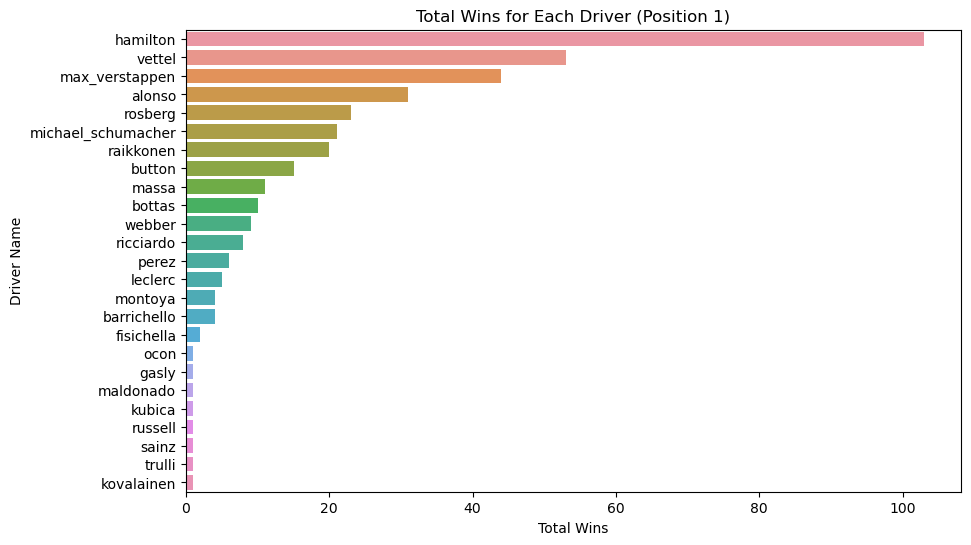

In [233]:
driver_winner = df[df['position_order'] == 1].groupby('driver')['position_order'].count().reset_index().sort_values(by='position_order', ascending=False).reset_index(drop=True)
sns.barplot(x = 'position_order',y= 'driver' ,data = driver_winner)
# Set the title and labels
plt.title('Total Wins for Each Driver (Position 1)')
plt.xlabel('Total Wins')
plt.ylabel('Driver Name')





In [234]:
top10drivers = driver_winner.head(10)
print(driver_winner)

                driver  position_order
0             hamilton             103
1               vettel              53
2       max_verstappen              44
3               alonso              31
4              rosberg              23
5   michael_schumacher              21
6            raikkonen              20
7               button              15
8                massa              11
9               bottas              10
10              webber               9
11           ricciardo               8
12               perez               6
13             leclerc               5
14             montoya               4
15         barrichello               4
16          fisichella               2
17                ocon               1
18               gasly               1
19           maldonado               1
20              kubica               1
21             russell               1
22               sainz               1
23              trulli               1
24          kovalainen   

<Axes: xlabel='position_order', ylabel='driver'>

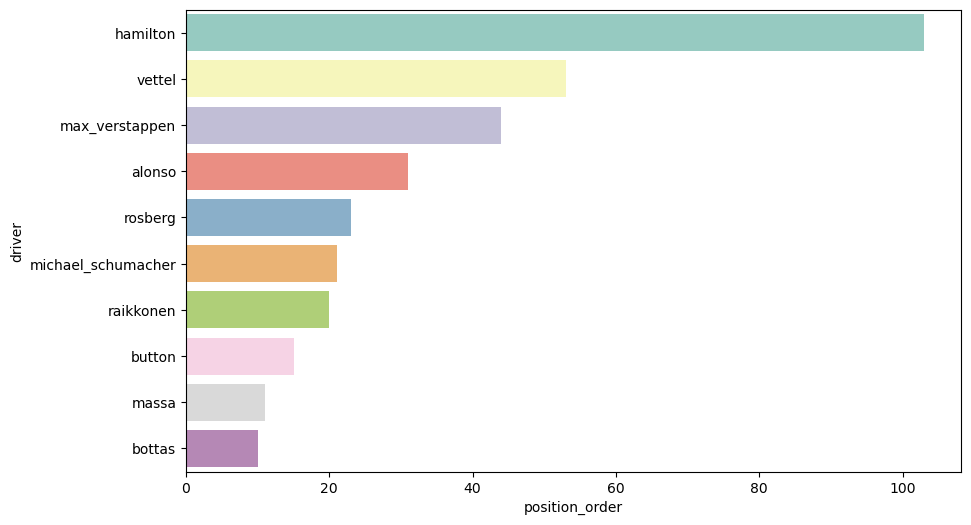

In [235]:
# top 10 driver plot 
sns.barplot(data =top10drivers, y ='driver',x='position_order')

Text(0, 0.5, 'contructor Name')

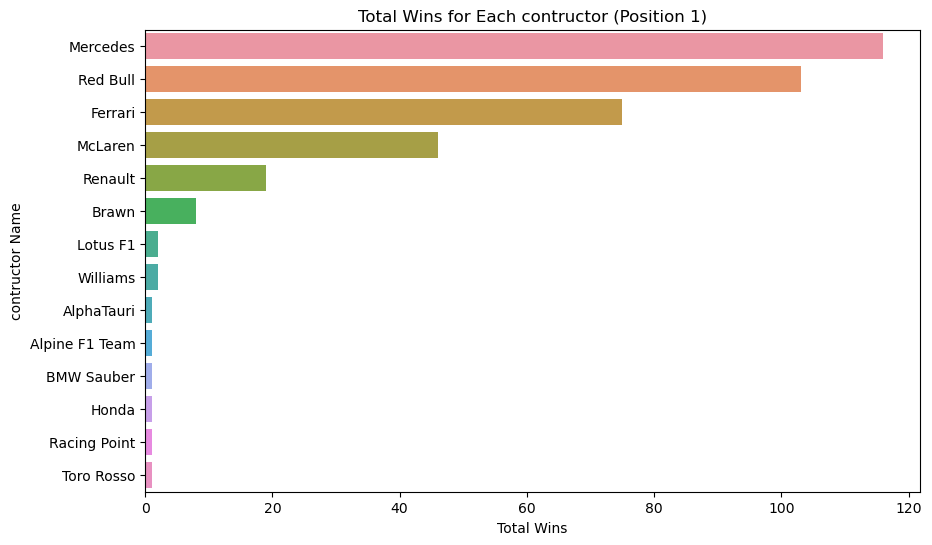

In [238]:
cons_winner = df[df['position_order'] == 1].groupby('constructor_name')['position_order'].count().reset_index().sort_values(by='position_order', ascending=False).reset_index(drop=True)
sns.barplot(x = 'position_order',y= 'constructor_name' ,data = cons_winner)
# Set the title and labels
plt.title('Total Wins for Each contructor (Position 1)')
plt.xlabel('Total Wins')
plt.ylabel('contructor Name')


In [240]:
topcons10 = cons_winner.head(10)
print(cons_winner)

   constructor_name  position_order
0          Mercedes             116
1          Red Bull             103
2           Ferrari              75
3           McLaren              46
4           Renault              19
5             Brawn               8
6          Lotus F1               2
7          Williams               2
8        AlphaTauri               1
9    Alpine F1 Team               1
10       BMW Sauber               1
11            Honda               1
12     Racing Point               1
13       Toro Rosso               1


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U1'), dtype('float64')) -> None

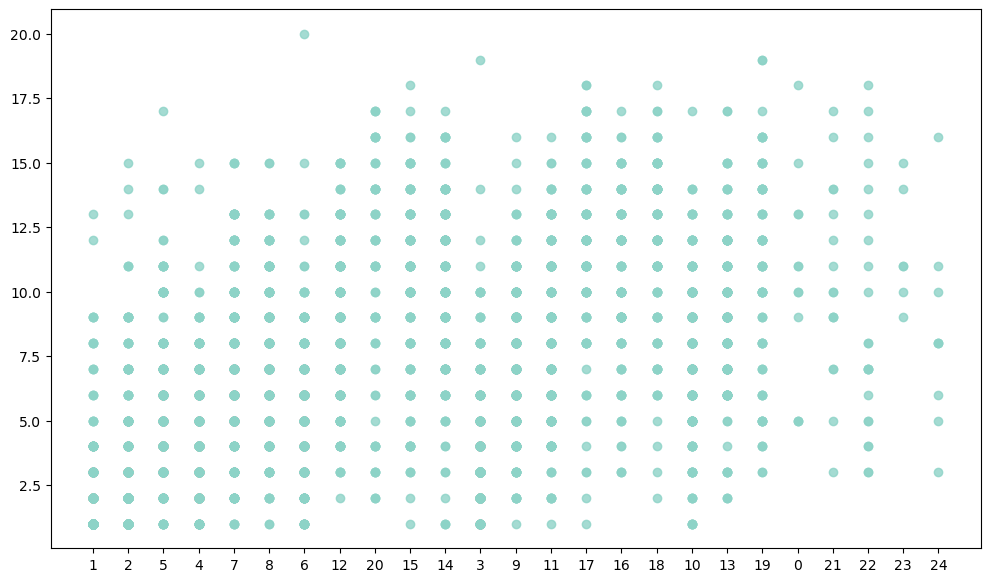

In [245]:
df_no_zero=df[df['grid']!=0]
#create a plot
plt.figure(figsize =[12,7])
sns.regplot(data=df_no_zero,x='grid',y='position_order')

plt.xlabel('starting position')
plt.ylabel('finish place')
